# ALG. k plus proches voisins

Cette partie a pour but de s'approprier le fonctionnement de l'algorithme des k plus proches voisins en tant qu'algorithme de prédiction.

<u>Source</u> : collection Hatier, NSI spécialité première


## Présentation du projet

A l'entrée de l'école de Poudlard (on innove après les Pokémons :) ), le Choixpeau magique répartit les élèves dans les différentes maisons (Gryffondor, Serpentard, Serdaigle et Poufsouffle) en fonction de leur courage, leur loyauté, leur sagesse et leur malice.

### Choixpeau, c'est lui : 
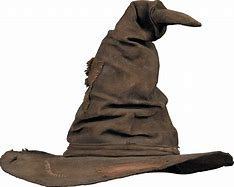

Le Choixpeau dispose d'un fichier CSV dans lequel sont répertoriées les données d'un échantillon d'élèves. Voici les 6 premières lignes de ce fichier :

<table border="1">
  <tr>
    <td>Noms</td>
    <td>Courage</td>
    <td>Loyauté</td>
    <td>Sagesse</td>
    <td>Malice</td>
    <td>Maison</td>
  </tr>
  <tr>
    <td>Adrian</td>
    <td>9</td>
    <td>4</td>
    <td>7</td>
    <td>10</td>
    <td>Serpentar</td>
  </tr>
<tr>
    <td>Andrew</td>
    <td>9</td>
    <td>3</td>
    <td>4</td>
    <td>7</td>
    <td>Griffondor</td>
  </tr><tr>
    <td>Angelina</td>
    <td>10</td>
    <td>6</td>
    <td>5</td>
    <td>9</td>
    <td>Griffondor</td>
  </tr><tr>
    <td>Anthony</td>
    <td>2</td>
    <td>8</td>
    <td>8</td>
    <td>3</td>
    <td>Serdaigle</td>
  </tr><tr>
    <td>Arthur</td>
    <td>10</td>
    <td>4</td>
    <td>2</td>
    <td>5</td>
    <td>Griffondor</td>
  </tr>
</table>


Voici les élèves que Choixpeau magique souhaite orienter :
<table border="1">
  <tr>
    <td>Noms</td>
    <td>Courage</td>
    <td>Loyauté</td>
    <td>Sagesse</td>
    <td>Malice</td>
  </tr>
  <tr>
    <td>Hermione</td>
    <td>8</td>
    <td>6</td>
    <td>6</td>
    <td>6</td>
  </tr>
<tr>
    <td>Drago</td>
    <td>6</td>
    <td>6</td>
    <td>5</td>
    <td>8</td>
  </tr><tr>
    <td>Cho</td>
    <td>7</td>
    <td>6</td>
    <td>9</td>
    <td>6</td>
  </tr><tr>
    <td>Cédric</td>
    <td>7</td>
    <td>10</td>
    <td>5</td>
    <td>6</td>
  </tr>
</table>


## <u>Activité 1</u> : Modélisation d'un élève

On décide de modéliser chaque élève par un dictionnaire avec les données disponibles. On a par exemple :

In [ ]:
adrian = {"nom" : "Adrian", "courage" : 9, "loyauté" : 4, "sagesse" : 7, "malice" : 10, "maison" : "Serpentar"}

1/ <b>Modéliser</b> ci-dessous l'élève Arthur.

In [ ]:
##################### Ecrire ici le code ###########################



2/ On décide d'utiliser la <b>distance de Manhattan</b> pour calculer la distance entre deux élèves, c'est à dire :
distance(élève1,élève2) = |courage1 - courage2| + |loyauté1 - loyauté2| + |sagesse1 - sagesse2| + |malice1 - malice2|

<u>Rappel</u> : |courage1 - courage2| est la <b>valeur absolue</b> c'est à dire la différence <u>non signée</u> entre <i>courage1</i> et <i>courage2</i>. Si <i>courage1</i> vaut 3 et <i>courage2</i> vaut 7, leur différence est de -4 soit une valeur absolue de 4. 

<u>Aide</u> : On utilisera <b>la fonction `abs(val1 - val2)` du langage Python</b> pour calculer la valeur absolue de la différence entre val1 et val2.

a) <b>Vérifier</b> que la distance (de Manhattan) entre <i>Hermione</i> et <i>Adrian</i> est de 8.

b) Quelle est la <b>distance</b> entre <i>Arthur</i> et <i>Drago</i> ? <b>Ecrire</b> le résultat ici : .....

c) <b>Ecrire</b> ci-dessous le code d'une fonction `distance` qui prend deux élèves en arguments et qui renvoie la distance (de Manhattan) entre ces deux élèves. On vérifiera le code à l'aide des résultats des questions 2/a) et 2/b), <b>ne pas oublier de modéliser les élèves en question à l'aide d'un dictionnaire (voir question 1/)</b>.

In [17]:
##################### Ecrire ici le code ###########################
def distance(elev1,elev2) :
    

### <u>Appel au professeur</u> (en cas de besoin)

## <u>Activité 2</u> : Chargement des données en tables

Voici une nouvelle façon de charger un fichier CSV. Le mot clé `with` permet de ne pas spécifier la fermeture du fichier, celle-ci se fera automatiquement. On remarquera également la méthode `__next()__` qui permet de lire chaque ligne du fichier (c'est un peu l'équivalent de `readlines()`).

Le mot clé `as` définit un <u>alias</u>, c'est à dire un surnom donné : il s'agit ici du nom du fichier. On retrouvera ce concept lors des requêtes SQL dans une base de données.

<u>Rappel</u> : les données d'un fichier CSV sont toujours du type <i>texte</i> : il faut donc les convertir dans le type voulu  si besoin.

In [1]:
######################### Exécuter le programme suivant #######################################

import csv

def charger_fichier(nom_fichier) :
    # les données sous forme de liste de dictionnaires dans la variable `table`
    table = []
    
    # Rappel : le 'r' signifie 'en lecture seule'
    with open(nom_fichier,'r',newline = "", encoding ="utf-8") as csvfile :
        eleve_reader = csv.reader(csvfile, delimiter = ";")
        eleve_reader.__next__()
        
        for eleve in eleve_reader :
            # Mise sous forme de dictionnaire de chaque ligne du fichier
            eleve_dict = { "nom" : eleve[0], "courage" : int(eleve[1]), "loyauté" : int(eleve[2]), 
                          "sagesse" : int(eleve[3]), "malice" : int(eleve[4]), "maison" : eleve[5]}
            
            # Ajout du dictionnaire dans la variable table 
            table.append(eleve_dict)
    
    return table

poudlard = charger_fichier("choixpeauMagique.csv")

1/ <b>Vérifier</b> que l'instruction ci-dessous affiche bien les caractéristiques des élèves sous forme de liste de dictionnaires

In [ ]:
print(poudlard)

2/ L'élève <i>Angelina</i> est la troisième de la liste de dictionnaires `table`. <b>Ecrire</b> l'instruction ci-dessous donnant la valeur de sa malice. On vérifiera la valeur obtenue à l'aide du tableau dans la partie 'présentation du projet'.

In [ ]:
##################### Ecrire ici l'instruction ###########################



## <u>Activité 3</u> : Trouver la maison majoritaire

<u>Problématique</u> : On souhaite écrire le code d'une fonction qui renvoie le nombre d'élèves par maison de poudlard à partir des données de la variable `poudlard`.

Voici les différentes maisons : <i>'Griffondor' ; 'Serpentar' ; 'Serdaigle' et 'Poufsouffle'</i>.

1/ <b>Ecrire</b> une fonction `effectif_maisons` permettant de résoudre la problématique.

<i><u>Résultats attendus</u> : "Serpentar" : 12 , "Griffondor" : 17 , "Serdaigle" : 11 , "Poufsouffle" : 10</i>


In [ ]:
################ Compléter la fonction ici #######################

def effectif_maisons(poudlard) :
    
    effectifs = {'Serpentar' : 0, 'Griffondor' : 0, 'Serdaigle' : 0, 'Poufsouffle' : 0}
    
    ################### A compléter ici ###########################
    
    ###############################################################
    
    return effectifs
    
    
print(effectif_maisons(poudlard))

2/ (*) <b>Modifier</b> le programme précédent pour obtenir la maison la plus représentée.

## <u>Activité 4</u> : Prédire la maison d'un nouvel élève

<u>Rappel</u> : Voici les élèves que Choixpeau magique souhaite orienter :
<table border="1">
  <tr>
    <td>Noms</td>
    <td>Courage</td>
    <td>Loyauté</td>
    <td>Sagesse</td>
    <td>Malice</td>
  </tr>
  <tr>
    <td>Hermione</td>
    <td>8</td>
    <td>6</td>
    <td>6</td>
    <td>6</td>
  </tr>
<tr>
    <td>Drago</td>
    <td>6</td>
    <td>6</td>
    <td>5</td>
    <td>8</td>
  </tr><tr>
    <td>Cho</td>
    <td>7</td>
    <td>6</td>
    <td>9</td>
    <td>6</td>
  </tr><tr>
    <td>Cédric</td>
    <td>7</td>
    <td>10</td>
    <td>5</td>
    <td>6</td>
  </tr>
</table>

1/ <b>Modéliser</b> ci-dessous l'élève <i>hermione</i> (voir activité 1) et <b>exécuter</b> l'instruction.


In [4]:
################# Ecrire l'instruction ici #######################
 
    

2/ <b>Récupérer</b> la fonction `distance` de l'activité 1, <b>Affecter<b> `hermione` à `nouvel_eleve`et lancer le script ci-dessous.

In [ ]:
###############################################################################################################
## Script trouvant les plus proches voisins d'un élève à l'aide  de l'algorithme des k plus proches voisins ###
###############################################################################################################

# Détermine le nombre de plus proches voisins à trouver
nombre_voisins = 7

################ Ecrire ici les caractéristiques d'un autre élève (si besoin) #####

###################################################################################

# Nouvel élève à tester
nouvel_eleve = #### A COMPLETER par le nom de la variable modélisant l'élève ####


################ Compléter la fonction distance ici #######################
def distance(elev1,elev2) :
    
##########################################################################


def distance_nouvel_eleve(eleve) :
    return distance(eleve, nouvel_eleve)
    
def eleves_plus_proches(poudlard,nouvel_eleve) :
    poudlard_trié = sorted(poudlard, key = distance_nouvel_eleve)
    
    proches_voisins = []
    for i in range(nombre_voisins) :
        proches_voisins.append(poudlard_trié[i])
        
    return proches_voisins

# Récupère et affiche les nombres_voisins plus proches du nouvel élève
plus_proches = eleves_plus_proches(poudlard,nouvel_eleve)
print(plus_proches)

3/(*) <b>Ecrire</b> ci-dessous la fonction `maison_eleve` permettant de prédire la maison d'<i>Hermione</i> (on vérifiera qu'il s'agit de Griffondor).

In [ ]:
##################### Ecrire la fonction ici ########################




### <u>Appel au professeur</u> (en cas de besoin)

4/ <b>Vérifier</b> que l'on peut prédire que l'élève <i>Drago</i> (voir tableau de l'activité 4) sera dans la maison Serpentar.

<b><u>Remarque</u></b> : veiller à modifier les programmes en ce sens !

### <u>Appel au professeur</u> (en cas de besoin)